In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
#Get data description 
boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [3]:
#Analize data features and values
print(boston.data.shape)
print(boston.feature_names)
print(len(boston.target),boston.target.dtype)
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
506 float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Analyze the distribution of the data
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
#Add to the pd_dataframe the information of the target
boston_df['MEDV'] = boston.target
print(boston_df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [6]:
#Analyze correlation between variables
correlation = boston_df.corr().round(2)
correlation.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


In [0]:
#Select and extract two features with the most correlation with the targets
data = np.c_[boston_df['RM'].values, boston_df['LSTAT'].values]

In [0]:
#Generate the data
x = data
y = boston_df['MEDV'].values

In [9]:
#Instanciar linear regression model
model = LinearRegression() 
#Split the data for future evaluation 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 5) 
#Train the model
model.fit(x_train,y_train)
#Predict
y_pred = model.predict(x_test)
print("Weights",model.coef_)
print("Bias", model.intercept_)

Weights [ 4.58938833 -0.71722954]
Bias 2.7362403426065995


In [10]:
#Analyze accuracy of the model
from sklearn.metrics import mean_squared_error as mse
Ac = mse(y_test, y_pred)
print("Accuracy:",(100 - Ac.round(2)), '%')

Accuracy: 73.61 %


In [11]:
from sklearn.metrics import r2_score
coef_determinacion = r2_score(y_test, y_pred)
print("coefficient of determination,  R^2:",coef_determinacion.round(2))

coefficient of determination,  R^2: 0.66


In [0]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

In [0]:
#Function that describes the hyperplane generated by the model
def f(x,y):
  z = []
  for a,b in zip(x,y):
    temporal = model.predict(np.c_[a,b])
    z.append(temporal)
  return np.array(z)

In [15]:
xx, yy = np.meshgrid(x_test[:,0], x_test[:,1])
print("dimx:",xx.shape, "dimy", yy.shape)
zz = f(xx,yy)
print("dimz:",zz.shape)

dimx: (102, 102) dimy (102, 102)
dimz: (102, 102)



Accuracy: 73.61 %
coefficient of determination,  R^2: 0.66


Text(0.5, 0, 'MEDV')

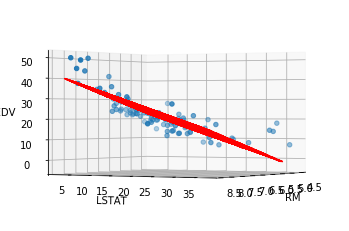

In [18]:
fig = plt.figure()

ax = plt.axes(projection = '3d',)
print()

ax.scatter(x_test[:,0], x_test[:,1], y_test)

print("Accuracy:",(100 - Ac.round(2)), '%')
print("coefficient of determination,  R^2:",coef_determinacion.round(2))
#Plot the surface

ax.plot_wireframe(xx,yy,zz,color='r') 
ax.view_init(elev=0, azim=30)

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')